In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

### Question 1

In [5]:
def integrate_and_fire_with_exc(spiketimes, timesteps, dt = 0.001, tau = 10, E_L = -70, E_exc = 0.0, bar_gl = 1.0, tau_gexc = 10, delta_gexc = 0.5, cm = 10, V_th = -54, V_reset = -80):
    """
    Implementation of an integrate and fire neuron with excitatory input conductances. 
    """

    time = np.arange(0, timesteps, dt) 
    Vs, gs, Is = [], [], []
    spikes = []

    V, gexc = E_L, 0
    I = gexc * (V - E_exc)

    Vs.append(E_L)
    gs.append(gexc)
    Is.append(I)

    curr_spiketime = spiketimes[0]
    spk_counter = 1 
    
    for i in range(1, len(time)):
        
        dv = (((-bar_gl * (V - E_L)) - (gexc * (V - E_exc))) / cm) * dt 
        dg = (-gexc / tau_gexc) * dt 
        V += dv 
        gexc += dg

        if time[i] == curr_spiketime:
            gexc += delta_gexc
            if spk_counter < len(spiketimes):
                curr_spiketime = spiketimes[spk_counter]
                spk_counter += 1 

        if V >= V_th:
            # Vs[i-1] = 50
            V = V_reset 
            spikes.append(1)

        I = gexc * (V - E_exc)

        Vs.append(V)
        gs.append(gexc)
        Is.append(I)

    return time, np.array(Vs), gs, Is, spikes 


In [6]:
spiketimes = [100, 200, 230, 300, 320, 400, 410]
timesteps = 500 
time, Vs, gs, Is, spikes = integrate_and_fire_with_exc(spiketimes, timesteps)

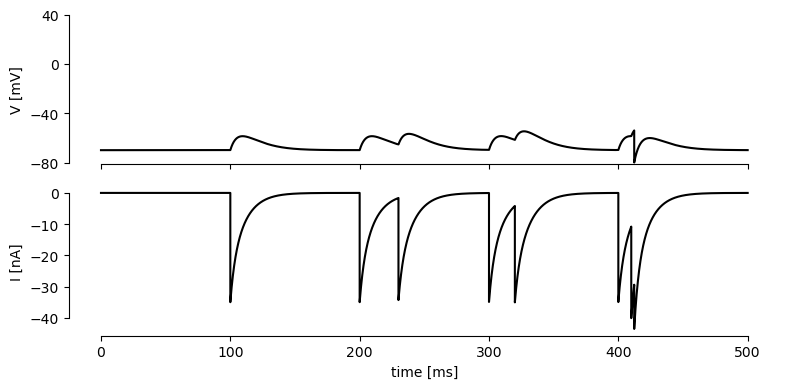

In [8]:
fig, (ax1, ax2) = plt.subplots(figsize = (8, 4), nrows = 2, ncols = 1, sharex = True)

Vs[Vs == -54] = 50

ax1.plot(time, Vs, c = 'k')
ax1.set_ylabel('V [mV]')
ax1.set_yticks([-80, -40, 0, 40])

ax2.plot(time, Is, c = 'k')
ax2.set_ylabel('I [nA]')
ax2.set_xlabel('time [ms]')

sns.despine(trim = True)
plt.tight_layout()
plt.savefig('homework2_1.pdf')

### Question 2 

In [5]:
def noisy_integrate_and_fire(sigma, timesteps, dt = 0.001, tau = 10, E_L = -70, V_th = -54, V_reset = -80):
    """
    Implementation of a noisy integrate and fire neuron. 
    """

    time = np.arange(0, timesteps, dt) 
    Vs, spikes = [], []

    V = E_L
    Vs.append(E_L)
    
    for i in range(1, len(time)):
        E_eff = -56 + sigma * np.sqrt(2 * tau / dt) * np.random.normal()
        dv = ((-V + E_eff) / tau) * dt
        V += dv 

        if V >= V_th:
            Vs[i-1] = 50
            V = V_reset
            spikes.append(1)
            
        Vs.append(V)
       
    return time, Vs, spikes 

In [6]:
sigma = np.arange(0, 10.1, 0.1)
timesteps = 5000
stdev = []

for s in sigma:
    time, Vs, _ = noisy_integrate_and_fire(s, timesteps, V_th = 1e8)
    stdev.append(np.std(Vs))

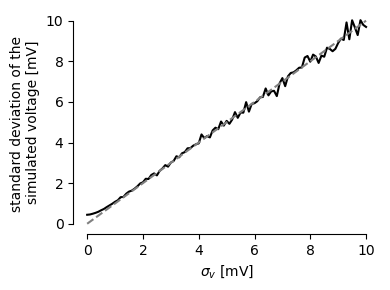

In [7]:
fig = plt.figure(figsize = (4, 3))

plt.plot(sigma, stdev, color = 'k')
plt.plot(sigma, sigma, color = 'gray', linestyle = 'dashed')
plt.xlabel(r'$\sigma_v$ [mV]')
plt.ylabel('standard deviation of the \nsimulated voltage [mV]')
sns.despine(trim = True)
plt.tight_layout()
plt.savefig('homework2_2a.pdf')

In [8]:
sigma = np.arange(0, 10.5, 0.5)
timesteps = 10000
spike_rate = []

for s in sigma:
    _, Vs, spikes = noisy_integrate_and_fire(s, timesteps, V_th = -54)
    spike_rate.append(np.nansum(spikes) / (timesteps/1000))

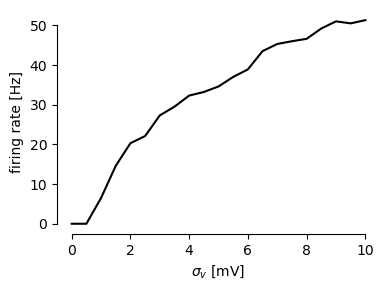

In [9]:
fig = plt.figure(figsize = (4, 3))
plt.plot(sigma, spike_rate, color = 'k')
plt.xlabel(r'$\sigma_v$ [mV]')
plt.ylabel('firing rate [Hz]')
sns.despine(trim = True)
plt.tight_layout()
plt.savefig('homework2_2b.pdf')